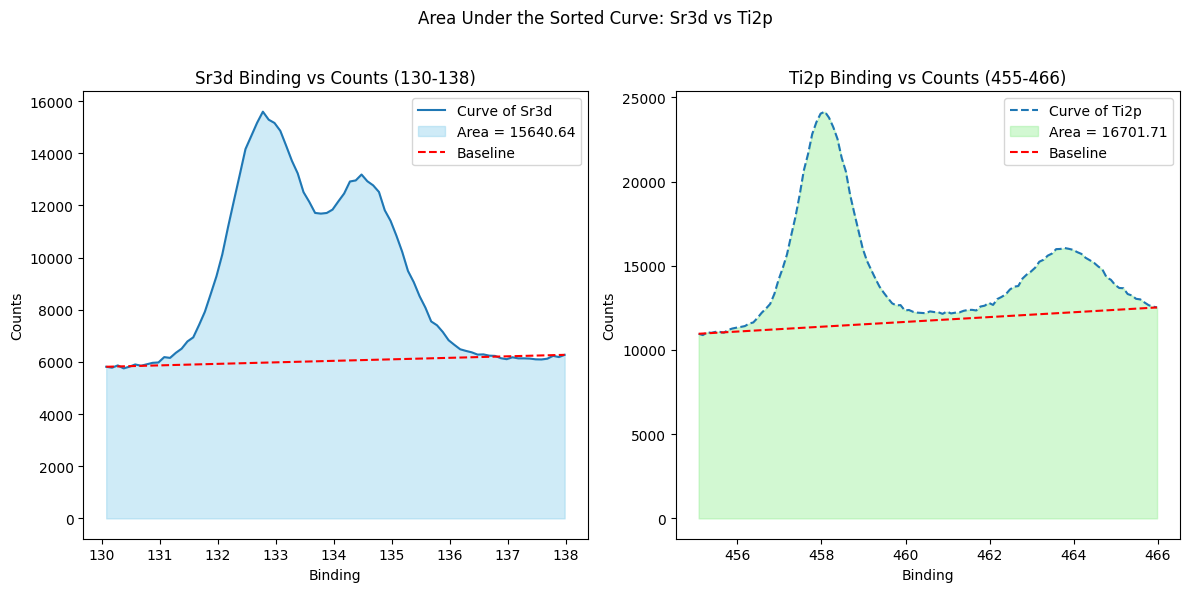

Area under the curve for Sr3d: 15640.64
Area under the curve for Ti2p: 16701.71
Ratio (Sr3d / Ti2p): 0.94


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_curve_from_excel(file_path_A, file_path_B, plot_title, x_label, y_label, x_A, y_A, x_B, y_B, scaling_factor_A, scaling_factor_B, name_compound_A, name_compound_B, binding_range_A=None, binding_range_B=None):
    # Load the Excel files from the provided paths
    df_A = pd.read_excel(file_path_A)
    df_B = pd.read_excel(file_path_B)

    # Extract the required columns for file A
    St_Counts_A = df_A.iloc[1:, y_A-1].dropna().tolist()  # y_A-th column (Counts), starting from the second row
    St_Binding_A = df_A.iloc[1:, x_A-1].dropna().tolist()  # x_A-th column (Binding), starting from the second row

    # Extract the required columns for file B
    St_Counts_B = df_B.iloc[1:, y_B-1].dropna().tolist()  # y_B-th column (Counts), starting from the second row
    St_Binding_B = df_B.iloc[1:, x_B-1].dropna().tolist()  # x_B-th column (Binding), starting from the second row

    # Sort St_Counts_A according to the sorted St_Binding_A
    sorted_indices_A = np.argsort(St_Binding_A)
    St_Binding_sorted_A = np.array(St_Binding_A)[sorted_indices_A]  # Binding (x-axis) is now sorted for file A
    St_Counts_sorted_A = np.array(St_Counts_A)[sorted_indices_A]    # Counts (y-axis) sorted based on Binding

    # Sort St_Counts_B according to the sorted St_Binding_B
    sorted_indices_B = np.argsort(St_Binding_B)
    St_Binding_sorted_B = np.array(St_Binding_B)[sorted_indices_B]  # Binding (x-axis) is now sorted for file B
    St_Counts_sorted_B = np.array(St_Counts_B)[sorted_indices_B]    # Counts (y-axis) sorted based on Binding

    # Apply the optional constraint on Binding for file A (if provided)
    if binding_range_A is not None:
        mask_A = (St_Binding_sorted_A >= binding_range_A[0]) & (St_Binding_sorted_A <= binding_range_A[1])
        St_Binding_sorted_A = St_Binding_sorted_A[mask_A]
        St_Counts_sorted_A = St_Counts_sorted_A[mask_A]

    # Apply the optional constraint on Binding for file B (if provided)
    if binding_range_B is not None:
        mask_B = (St_Binding_sorted_B >= binding_range_B[0]) & (St_Binding_sorted_B <= binding_range_B[1])
        St_Binding_sorted_B = St_Binding_sorted_B[mask_B]
        St_Counts_sorted_B = St_Counts_sorted_B[mask_B]

    # Calculate the area under the curve using the trapezoidal rule from numpy
    # Using the start and end points only
    # Calculate the area under the curve using the trapezoidal rule from numpy
    area_A = np.trapz(St_Counts_sorted_A, St_Binding_sorted_A)
    area_B = np.trapz(St_Counts_sorted_B, St_Binding_sorted_B)
    area_A_baseline = (St_Binding_sorted_A[-1] - St_Binding_sorted_A[0]) * (St_Counts_sorted_A[0] + St_Counts_sorted_A[-1]) / 2
    area_B_baseline = (St_Binding_sorted_B[-1] - St_Binding_sorted_B[0]) * (St_Counts_sorted_B[0] + St_Counts_sorted_B[-1]) / 2

    area_A_baseline_corrected = area_A - area_A_baseline
    area_B_baseline_corrected = area_B - area_B_baseline
    # Normalize the areas using the provided scaling factors
    area_A_normalized = area_A_baseline_corrected / scaling_factor_A
    area_B_normalized = area_B_baseline_corrected / scaling_factor_B

    # Calculate the ratio of the areas
    Ratio = area_A_normalized / area_B_normalized

    # Create subplots: 1 row, 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for Compound A
    axes[0].plot(St_Binding_sorted_A, St_Counts_sorted_A, label=f'Curve of {name_compound_A}')
    axes[0].fill_between(St_Binding_sorted_A, St_Counts_sorted_A, color='skyblue', alpha=0.4, label=f'Area = {area_A_normalized:.2f}')
    
    # Draw a straight line from start to end for Compound A
    axes[0].plot([St_Binding_sorted_A[0], St_Binding_sorted_A[-1]], 
                 [St_Counts_sorted_A[0], St_Counts_sorted_A[-1]], 
                 color='red', linestyle='--', label='Baseline')

    title_A = f'{name_compound_A} Binding vs Counts'
    if binding_range_A is not None:
        title_A += f' ({binding_range_A[0]}-{binding_range_A[1]})'
    axes[0].set_title(title_A)
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)
    axes[0].legend()

    # Plot for Compound B
    axes[1].plot(St_Binding_sorted_B, St_Counts_sorted_B, label=f'Curve of {name_compound_B}', linestyle='--')
    axes[1].fill_between(St_Binding_sorted_B, St_Counts_sorted_B, color='lightgreen', alpha=0.4, label=f'Area = {area_B_normalized:.2f}')
    
    # Draw a straight line from start to end for Compound B
    axes[1].plot([St_Binding_sorted_B[0], St_Binding_sorted_B[-1]], 
                 [St_Counts_sorted_B[0], St_Counts_sorted_B[-1]], 
                 color='red', linestyle='--', label='Baseline')

    title_B = f'{name_compound_B} Binding vs Counts'
    if binding_range_B is not None:
        title_B += f' ({binding_range_B[0]}-{binding_range_B[1]})'
    axes[1].set_title(title_B)
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)
    axes[1].legend()

    # Adjust layout
    plt.suptitle(plot_title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plot
    plt.show()


    # Display the calculated areas and ratio
    print(f"Area under the curve for {name_compound_A}: {area_A_normalized:.2f}")
    print(f"Area under the curve for {name_compound_B}: {area_B_normalized:.2f}")
    print(f"Ratio ({name_compound_A} / {name_compound_B}): {Ratio:.2f}")

# Example usage:
file_path_A = '/home/kinkini/Downloads/sample 5 Sr3d.xlsx'
file_path_B = '/home/kinkini/Downloads/sample 5 Ti2p.xlsx'
plot_title = 'Area Under the Sorted Curve: Sr3d vs Ti2p'
x_label = 'Binding'
y_label = 'Counts'
name_compound_A = 'Sr3d'
name_compound_B = 'Ti2p'
scaling_factor_A = 1.578 #scaling factor for compund A
scaling_factor_B = 1.798 #scaling factor for compund B
x_A = 1  # The column number for Binding in file A
y_A = 3  # The column number for Counts in file A
x_B = 1  # The column number for Binding in file B
y_B = 3  # The column number for Counts in file B

# Optional Binding ranges: uncomment to apply constraints
binding_range_A = (130, 138)  # Optional range for Sr3d
#binding_range_B = None  # No constraint for Ti2p
binding_range_B = (455, 466)  # No constraint for Ti2p

plot_curve_from_excel(file_path_A, file_path_B, plot_title, x_label, y_label, x_A, y_A, x_B, y_B, scaling_factor_A, scaling_factor_B, name_compound_A, name_compound_B, binding_range_A, binding_range_B)
